In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split

# sklearn :: models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

# sklearn :: evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

sns.set_style('whitegrid')

# Problem definition

Apply regression models to predict Airbnb prices

# Load the data

In [83]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
print(df_train.shape, df_test.shape)

(51000, 29) (23111, 28)


# Feature Engineering 

In [84]:
print(df_train.columns)
df_train.head()

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,13662370,3.806662,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.5,Real Bed,strict,True,...,41.849684,-87.676270,Pilsen Arts Community Custom Home,Pilsen,17,97.0,https://a0.muscache.com/im/pictures/81318153/a...,60608,1.0,1.0
1,4765892,4.941642,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,2.0,Real Bed,strict,True,...,34.068613,-118.246455,Apartment 5 minutes from DTLA & Dodger Stadium,Echo Park,2,100.0,https://a0.muscache.com/im/pictures/aa00250e-0...,90012,1.0,1.0
2,21169968,4.941642,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.701958,-73.917352,"Brand New Huge 2bdr apartment(L,M train 2 min)",Bushwick,25,88.0,https://a0.muscache.com/im/pictures/d9220535-c...,11237,2.0,3.0
3,7939196,4.867534,Apartment,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",6,1.0,Real Bed,strict,True,...,40.742959,-73.990820,Grande Super Large APT !!!,Flatiron District,12,82.0,NaN,10010,1.0,3.0
4,18161036,3.663562,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,...,34.046473,-117.734095,Private Cozy and Clean Rooms in Pomona,NaN,2,100.0,https://a0.muscache.com/im/pictures/e0c9b2f9-a...,91766,1.0,1.0


In [85]:
df_train.loc[:,'city':'latitude'].head()

,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude
0,Chicago,CLOSE TO EVERYTHING VIA PUBLIC Love arts & cul...,2015-05-25,t,t,100%,2015-05-20,t,2017-01-01,41.849684
1,LA,Bright and spacious apartment located in a qui...,2015-11-09,t,t,100%,2015-09-08,f,2015-11-15,34.068613
2,NYC,New huge 2bdr apartment. Bushwick area. 2 min ...,2017-05-15,t,t,100%,2017-05-06,t,2017-09-25,40.701958
3,NYC,Hello travelers!!! SO my apt is located in Che...,2012-11-12,t,t,70%,2009-02-06,f,2017-07-29,40.742959
4,LA,"Very cozy, clean, safe and quite single house ...",2017-02-17,t,t,100%,2015-10-20,f,2017-03-25,34.046473


In [86]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 29 columns):
id                        51000 non-null int64
log_price                 51000 non-null float64
property_type             51000 non-null object
room_type                 51000 non-null object
amenities                 51000 non-null object
accommodates              51000 non-null int64
bathrooms                 50867 non-null float64
bed_type                  51000 non-null object
cancellation_policy       51000 non-null object
cleaning_fee              51000 non-null bool
city                      51000 non-null object
description               51000 non-null object
first_review              40144 non-null object
host_has_profile_pic      50873 non-null object
host_identity_verified    50873 non-null object
host_response_rate        38449 non-null object
host_since                50873 non-null object
instant_bookable          51000 non-null object
last_review               401

In [87]:
df_train.describe(include='all')

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
count,5.100000e+04,51000.000000,51000,51000,51000,51000.000000,50867.000000,51000,51000,51000,...,51000.000000,51000.000000,51000,46325,51000.000000,39550.000000,45371,50355,50937.000000,50915.000000
unique,NaN,NaN,33,3,47087,NaN,NaN,5,5,2,...,NaN,NaN,50607,597,NaN,NaN,45364,732,NaN,NaN
top,NaN,NaN,Apartment,Entire home/apt,{},NaN,NaN,Real Bed,strict,True,...,NaN,NaN,Bunk bed in the Treat Street Clubhouse,Williamsburg,NaN,NaN,https://a0.muscache.com/im/pictures/4491e5c5-3...,11211.0,NaN,NaN
freq,NaN,NaN,33676,28367,397,NaN,NaN,49537,22293,37451,...,NaN,NaN,6,1942,NaN,NaN,2,927,NaN,NaN
mean,1.127396e+07,4.778693,NaN,NaN,NaN,3.153725,1.232420,NaN,NaN,NaN,...,38.452159,-92.404169,NaN,NaN,21.010157,94.036359,NaN,NaN,1.265642,1.709084
std,6.071084e+06,0.714838,NaN,NaN,NaN,2.165303,0.578569,NaN,NaN,NaN,...,3.077453,21.708577,NaN,NaN,38.073839,7.922591,NaN,NaN,0.856894,1.253278
min,3.440000e+02,0.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,...,33.338905,-122.510940,NaN,NaN,0.000000,20.000000,NaN,NaN,0.000000,0.000000
25%,6.311556e+06,4.304065,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,...,34.128569,-118.342521,NaN,NaN,1.000000,92.000000,NaN,NaN,1.000000,1.000000
50%,1.226652e+07,4.700480,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,...,40.662147,-76.996983,NaN,NaN,6.000000,96.000000,NaN,NaN,1.000000,1.000000
75%,1.639201e+07,5.216291,NaN,NaN,NaN,4.000000,1.000000,NaN,NaN,NaN,...,40.746418,-73.954359,NaN,NaN,24.000000,100.000000,NaN,NaN,1.000000,2.000000


In [88]:
# drop probable outliers/errors
df_train = df_train.drop(df_train[df_train['log_price']==0].index)
df_train = df_train.drop(df_train[(df_train['accommodates']<=6) & (df_train['beds']>=16)].index)

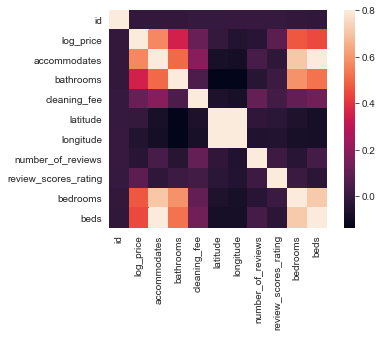

In [89]:
# compute correlation
df_corr = df_train.corr()

corrmat = df_corr
f, ax = plt.subplots()
sns.heatmap(corrmat, vmax=.8, square=True)

plt.show()

In [90]:
df_train['property_type'].value_counts()

Apartment             33676
House                 11416
Condominium            1811
Townhouse              1199
Loft                    859
Other                   417
Guesthouse              329
Bed & Breakfast         309
Bungalow                243
Villa                   122
Dorm                     97
Guest suite              83
Camper/RV                63
Cabin                    56
Boutique hotel           53
Timeshare                52
Hostel                   49
In-law                   47
Boat                     45
Serviced apartment       16
Castle                   10
Tent                      9
Vacation home             7
Yurt                      6
Treehouse                 5
Hut                       4
Earth House               4
Tipi                      2
Chalet                    2
Cave                      2
Train                     1
Lighthouse                1
Island                    1
Name: property_type, dtype: int64

In [91]:
df_train.groupby(['property_type'])['log_price'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
Lighthouse,1.0,5.521461,NaN,5.521461,5.521461,5.521461,5.521461,5.521461
Timeshare,52.0,5.509210,0.517819,4.174387,5.298317,5.517453,5.701278,6.683361
Castle,10.0,5.301899,0.457953,4.700480,4.985209,5.229045,5.421219,6.131226
Earth House,4.0,5.285391,1.249856,4.174387,4.375585,5.029711,5.939517,6.907755
Tipi,2.0,5.258999,1.121599,4.465908,4.862453,5.258999,5.655544,6.052089
Boat,45.0,5.231895,0.738663,4.174387,4.605170,5.247024,5.556828,7.130899
Serviced apartment,16.0,5.175853,0.668443,4.595120,4.676653,5.035030,5.399246,7.090077
Train,1.0,5.135798,NaN,5.135798,5.135798,5.135798,5.135798,5.135798
Vacation home,7.0,5.102172,0.546727,4.488636,4.866794,4.941642,5.168365,6.214608


In [92]:
# reduce dimensions of property type based on type/mean price

properties_group = {'Apartment':['Loft'],
         'House':['Townhouse', 'Bungalow'],
         'Cheap':['Dorm','Hostel','Hut','Treehouse'],
         'Moderate':['Cabin','Camper/RV','Tent','Bed & Breakfast','Chalet','Guesthouse','Guest suite','In-law'],
         'Pricey':['Serviced apartment','Vacation home','Villa','Condominium','Boutique hotel'],
         'Other_expensive':['Lighthouse', 'Timeshare','Castle','Earth House','Tipi','Boat','Train','Island'],
         'Other':['Yurt','Cave']           
        }
new_properties = {i : k for k, v in properties_group.items() for i in v}
df_train['property_type']=df_train['property_type'].replace(new_properties)
df_test['property_type']=df_test['property_type'].replace(new_properties)

In [93]:
# create one hot encoding of categoricals

# create one hot encoding of property type
df_property = pd.get_dummies(df_train['property_type'])
# apply to test data
df_property_test = pd.get_dummies(df_test['property_type'])

# create one hot encoding of room type
df_room = pd.get_dummies(df_train['room_type'])
df_room_test = pd.get_dummies(df_test['room_type'])

# create one hot encoding of city
df_city = pd.get_dummies(df_train['city'])
df_city_test = pd.get_dummies(df_test['city'])

# create one hot encoding of cancellation policy
df_cancel = pd.get_dummies(df_train['cancellation_policy'])
df_cancel_test = pd.get_dummies(df_test['cancellation_policy'])

In [94]:
# turn host identity verified into boolean
df_train['host_identity_verified'] = df_train['host_identity_verified'] == 't'
df_test['host_identity_verified'] = df_test['host_identity_verified'] == 't'

# turn instant bookable into boolean
df_train['instant_bookable'] = df_train['instant_bookable'] == 't'
df_test['instant_bookable'] = df_test['instant_bookable'] == 't'

# turn host response rate into numeric
df_train['host_response_rate']=df_train['host_response_rate'].str.replace('%','').astype('float')
df_test['host_response_rate']=df_test['host_response_rate'].str.replace('%','').astype('float')

In [95]:
# fill missing items from beds, bedrooms and bathrooms with most frequent
df_train['beds']=df_train['beds'].fillna(df_train['beds'].mode())
df_test['beds']=df_test['beds'].fillna(df_test['beds'].mode())

df_train['bedrooms']=df_train['bedrooms'].fillna(df_train['bedrooms'].mode())
df_test['bedrooms']=df_test['bedrooms'].fillna(df_test['bedrooms'].mode())

df_train['bathrooms']=df_train['bathrooms'].fillna(df_train['bathrooms'].mode())
df_test['bathrooms']=df_test['bathrooms'].fillna(df_test['bathrooms'].mode())

# fill missing items from review scores rating with median (because generally high ratings)
df_train['review_scores_rating']=df_train['review_scores_rating'].fillna(df_train['review_scores_rating'].median())
df_test['review_scores_rating']=df_test['review_scores_rating'].fillna(df_test['review_scores_rating'].median())

In [96]:
# create feature: total amenities
df_train['total_amenities'] = df_train['amenities'].str.split(',').str.len()
df_test['total_amenities'] = df_test['amenities'].str.split(',').str.len()

# create feature: review_scores_rating * number_of_reviews (because they are correlated)
df_train['review_scores*number'] = df_train['review_scores_rating']*df_train['number_of_reviews']
df_test['review_scores*number'] = df_test['review_scores_rating']*df_test['number_of_reviews']

# create feature: beds * bathrooms * bedrooms (because they are correlated)
df_train['beds*bath*rooms'] = df_train['beds']*df_train['bedrooms']*df_train['bathrooms']
df_test['beds*bath*rooms'] = df_test['beds']*df_test['bedrooms']*df_test['bathrooms']

In [97]:
# round lat and long for larger grouping by area
df_train['latitude'] = df_train['latitude'].round(4)
df_train['longitude'] = df_train['longitude'].round(4)

In [98]:
# merge the dataframes
df_train = pd.concat([df_train, df_property, df_room, df_city, df_cancel], axis=1)
df_test = pd.concat([df_test, df_property_test, df_room_test, df_city_test, df_cancel_test], axis=1)

In [99]:
# select the columns

# create lists of one-hot encoded columns
properties_list = list(df_property.columns)
room_list = list(df_room.columns)
city_list = list(df_city.columns)
cancel_list = list(df_cancel.columns)

X_columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'total_amenities','review_scores_rating', 'number_of_reviews','latitude','longitude', 'review_scores*number', 'beds*bath*rooms', 'cleaning_fee', 'instant_bookable', 'host_response_rate', 'host_identity_verified'] + room_list + city_list + properties_list + cancel_list
y_column = ['log_price']

In [100]:
# handle missing values
df_train = df_train[X_columns + y_column]
print(df_train.shape)
df_train = df_train.fillna(0.0)
print(df_train.shape)

df_test = df_test.fillna(0.0)

(50996, 37)
(50996, 37)


# Model Training

In [101]:
# split the data using sklearn

threshold = 0.8
X = df_train[X_columns]
y = df_train[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (40796, 36)
y_train (40796, 1)
X_test (10200, 36)
y_test (10200, 1)


In [102]:
# train a random forest regression
model = RandomForestRegressor(200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\Kirsten\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


# Model Evaluation

RMSE 0.39


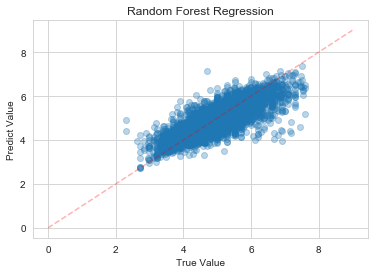

In [103]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE', round(rmse, 3))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
plt.title('Random Forest Regression')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.show()

In [104]:
# model with more data
model = RandomForestRegressor(200)
model.fit(X, y)
# y_pred = model.predict(X_test)
print(X.shape)
print(y.shape)

C:\Users\Kirsten\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


(50996, 36)
(50996, 1)


# Prepare submission

In [105]:
df_prediction = df_test[X_columns].fillna(0.0)
df_test['log_price'] = model.predict(df_prediction)
df_test[['id', 'log_price']]

,id,log_price
0,986942,4.149440
1,16436737,4.380040
2,18209634,4.035720
3,15027024,4.318124
4,18074243,4.948420
5,8446914,5.303229
6,19362916,4.205367
7,16116059,6.029866
8,20912583,4.878100
9,13573101,4.899941


In [106]:
df_test[['id', 'log_price']].to_csv('submission_linear_regression.csv', index=False)